In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D

In [8]:
LABELS = ["Alt_Si3N4", "Anc_Si3N4", "lambda", "n_eff", "A_eff"]

with h5py.File("Datos_reto\\Datos_7.h5", "r") as f:
    A = f["/A"][...]           # p.ej. (5, 1, 1, 1)
    print("shape bruto:", A.shape)

# --- normaliza: lleva el eje de tamaño 5 al último ---
axis5 = next((ax for ax, s in enumerate(A.shape) if s == 5), None)
if axis5 is None:
    raise ValueError("No encontré un eje de tamaño 5 en el dataset")
if axis5 != A.ndim - 1:
    A = np.moveaxis(A, axis5, -1)

print("shape normalizado:", A.shape)   # ahora debe ser (n_alt, n_anc, n_lamb, 5)

def print_voxel(arr, i, j, k):
    ii, jj, kk = i-1, j-1, k-1     # Lumerical es 1-based
    vals = arr[ii, jj, kk, :]      # vector de 5
    for name, v in zip(LABELS, vals):
        print(f"{name:10s} = {v:.6g}")

# ejemplo (con tus números actuales seguramente es 1,1,1
print_voxel(A, 1, 1, 1)

shape bruto: (5, 9, 4, 4)
shape normalizado: (9, 4, 4, 5)
Alt_Si3N4  = 0.8
Anc_Si3N4  = 1.5
lambda     = 0.72
n_eff      = 1.98043
A_eff      = 6.63237e-13


In [9]:
def to_dataframe(arr):
    nA, nB, nC, _ = arr.shape
    rows = []
    for ii in range(nA):
        for jj in range(nB):
            for kk in range(nC):
                rec = {"i": ii+1, "j": jj+1, "k": kk+1}
                for p, name in enumerate(LABELS):
                    rec[name] = arr[ii, jj, kk, p]
                rows.append(rec)
    return pd.DataFrame(rows, columns=["i","j","k"]+LABELS)

df = to_dataframe(A)
print(df)

     i  j  k  Alt_Si3N4  Anc_Si3N4  lambda     n_eff         A_eff
0    1  1  1   0.800000   1.500000    0.72  1.980428  6.632374e-13
1    1  1  2   0.813333   1.500000    0.72  1.981473  6.726977e-13
2    1  1  3   0.826667   1.500000    0.72  1.982378  6.812902e-13
3    1  1  4   0.840000   1.500000    0.72  1.983322  6.906010e-13
4    1  2  1   0.800000   1.533333    0.72  1.980991  6.763462e-13
..  .. .. ..        ...        ...     ...       ...           ...
139  9  3  4   0.840000   1.566667    0.89  1.951904  7.629574e-13
140  9  4  1   0.800000   1.600000    0.89  1.948711  7.488506e-13
141  9  4  2   0.813333   1.600000    0.89  1.950147  7.588663e-13
142  9  4  3   0.826667   1.600000    0.89  1.951402  7.680427e-13
143  9  4  4   0.840000   1.600000    0.89  1.952708  7.779623e-13

[144 rows x 8 columns]


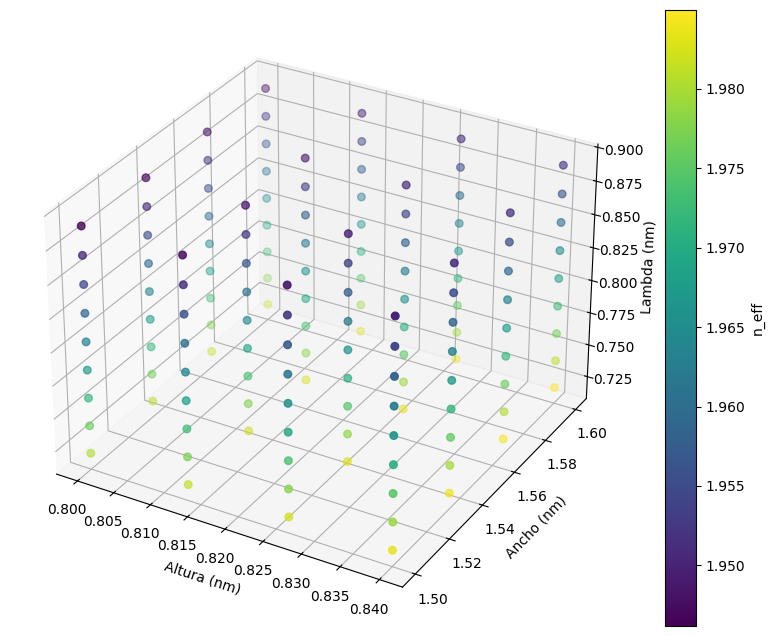

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(df["Alt_Si3N4"], df["Anc_Si3N4"], df["lambda"],
               c=df["n_eff"], cmap="viridis", s=30)

ax.set_xlabel("Altura (nm)")
ax.set_ylabel("Ancho (nm)")
ax.set_zlabel("Lambda (nm)")
fig.colorbar(p, ax=ax, label="n_eff")

plt.show()

In [12]:
# --- seleccionar 5 lambdas de bombeo al azar ---
lambdas_p = df["lambda"].unique()
lambdas_p_sel = random.sample(list(lambdas_p), 5)

resultados = []

for lp in lambdas_p_sel:
    # barrido de lambda_s en el rango
    for ls in np.linspace(1530, 1570, 100):   # puedes ajustar resolución
        li = 1 / (1/lp - 1/ls)  # nm
        if 500 <= li <= 680:    # condición dentro del rango
            # buscar n_eff más cercano en el dataset
            neff_s = df.loc[(df["lambda"].sub(ls).abs().idxmin()), "n_eff"]
            neff_i = df.loc[(df["lambda"].sub(li).abs().idxmin()), "n_eff"]
            resultados.append({
                "lambda_p (nm)": lp,
                "lambda_s (nm)": ls,
                "lambda_i (nm)": li,
                "n_eff_s": neff_s,
                "n_eff_i": neff_i
            })

tabla = pd.DataFrame(resultados)
print(tabla)

Empty DataFrame
Columns: []
Index: []
